# Understanding Olympic DataSet:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('olympic_athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [16]:
df.skew(numeric_only =  True)

ID       -0.004681
Age       1.747123
Height    0.018477
Weight    0.797169
Year     -0.817736
dtype: float64

In [17]:
df.kurt(numeric_only = True)

ID       -1.197292
Age       6.270642
Height    0.177728
Weight    2.017523
Year     -0.206948
dtype: float64

In [18]:
df_noc = pd.read_csv('olympic_noc_regions.csv')
df_noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [19]:
df_olympics = pd.merge(df, df_noc, how = 'inner' , on = 'NOC')
df_olympics.drop(columns = 'notes' , inplace=True)
df_olympics.rename(columns = {'region' : 'Region'}, inplace=True)
df_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


In [20]:
df_olympics_w = df_olympics[df_olympics['Season'] == 'Winter'].reset_index(drop = True)
df_olympics_w.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,China
1,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,China
2,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,China
3,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,China
4,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze,China


In [21]:
df_olympics = df_olympics[df_olympics['Season'] == 'Summer'].reset_index(drop = True)
df_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


In [22]:
df_olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222203 entries, 0 to 222202
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      222203 non-null  int64  
 1   Name    222203 non-null  object 
 2   Sex     222203 non-null  object 
 3   Age     213026 non-null  float64
 4   Height  170434 non-null  float64
 5   Weight  168439 non-null  float64
 6   Team    222203 non-null  object 
 7   NOC     222203 non-null  object 
 8   Games   222203 non-null  object 
 9   Year    222203 non-null  int64  
 10  Season  222203 non-null  object 
 11  City    222203 non-null  object 
 12  Sport   222203 non-null  object 
 13  Event   222203 non-null  object 
 14  Medal   34079 non-null   object 
 15  Region  222182 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 27.1+ MB


In [23]:
df_olympics_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48564 entries, 0 to 48563
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      48564 non-null  int64  
 1   Name    48564 non-null  object 
 2   Sex     48564 non-null  object 
 3   Age     48279 non-null  float64
 4   Height  40250 non-null  float64
 5   Weight  39543 non-null  float64
 6   Team    48564 non-null  object 
 7   NOC     48564 non-null  object 
 8   Games   48564 non-null  object 
 9   Year    48564 non-null  int64  
 10  Season  48564 non-null  object 
 11  City    48564 non-null  object 
 12  Sport   48564 non-null  object 
 13  Event   48564 non-null  object 
 14  Medal   5695 non-null   object 
 15  Region  48564 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 5.9+ MB


# Data Preprocessing:

- Handling Duplicates Values

In [28]:
df_olympics.duplicated().sum()

1385

In [29]:
df_olympics.drop_duplicates(inplace=True) # Dropping Dupilcates.
df_olympics.duplicated().sum()

0

- Handling Missing values.

In [30]:
df_olympics.isna().sum()/len(df_olympics)  *100
# percentage of missing values.

ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.083906
Height    22.829661
Weight    23.737195
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     84.571910
Region     0.009510
dtype: float64

In [31]:
df_olympics.skew(numeric_only=True) # for age replace it by median.
# for height replace it by mean.
# for weight replace it by mean/median.

ID       -0.002744
Age       1.596105
Height    0.018975
Weight    0.845989
Year     -0.748808
dtype: float64

In [32]:
df_olympics.fillna(value = {'Age' : df_olympics['Age'].median() , 'Height' : df_olympics['Height'].mean(),
                            'Weight' : df_olympics['Weight'].mean(), 'Medal' : 'No Medal',
                            'Region' : 'Unknown'} , inplace=True)

df_olympics.isna().sum()/len(df_olympics)  *100
# no missing value.

ID        0.0
Name      0.0
Sex       0.0
Age       0.0
Height    0.0
Weight    0.0
Team      0.0
NOC       0.0
Games     0.0
Year      0.0
Season    0.0
City      0.0
Sport     0.0
Event     0.0
Medal     0.0
Region    0.0
dtype: float64

- Outlier Detection and Treatment:

In [33]:
numeric_data = df_olympics.select_dtypes(include= np.number)
numeric_data

,ID,Age,Height,Weight,Year
0,1,24.0,180.000000,80.000000,1992
1,2,23.0,170.000000,60.000000,2012
2,602,22.0,182.000000,75.000000,2000
3,1463,25.0,160.000000,62.000000,2004
4,1464,14.0,168.000000,54.000000,2016
...,...,...,...,...,...
222198,120575,23.0,150.000000,56.000000,2008
222199,120575,27.0,150.000000,56.000000,2012
222200,122166,15.0,175.522358,70.697082,1996
222201,122215,23.0,170.000000,63.000000,1984


In [34]:
for col in numeric_data.columns:
    Q1 = df_olympics[col].quantile(0.25)
    Q2 = df_olympics[col].quantile(0.5)
    Q3 = df_olympics[col].quantile(0.75)
    IQR = Q3- Q1
    LW = Q1 - (1.5*IQR)
    UW = Q3 + (1.5*IQR)
    outliers = ((df_olympics[col]>UW) | (df_olympics[col]<LW))
    if outliers.sum()>0:
        print(f"The {col} has {outliers.sum()/len(df_olympics) *100 :.2f}% outliers.")
        df_olympics.loc[(df_olympics[col]>UW) | (df_olympics[col]<LW) , col] = Q2
        print(f"Outliers removed succesfully.")
    else:
        print(f"The {col} has No Outliers.")

The ID has No Outliers.
The Age has 4.68% outliers.
Outliers removed succesfully.
The Height has 4.54% outliers.
Outliers removed succesfully.
The Weight has 6.27% outliers.
Outliers removed succesfully.
The Year has 0.17% outliers.
Outliers removed succesfully.


## Visulaisation and Insight Generation (simple)

### 1. How many countries has Participated Olympics so far?


In [41]:
df_olympics['Region'].nunique()
# almost all country participated atleast once in olympic.

206

### 2. Find out Gender distribution of atheletes?

In [42]:
df_olympics['Sex'].value_counts()/ len(df_olympics)  *100 

M    73.204177
F    26.795823
Name: Sex, dtype: float64

In [43]:
df_olympics['Sex'].value_counts(normalize= True)  *100

M    73.204177
F    26.795823
Name: Sex, dtype: float64

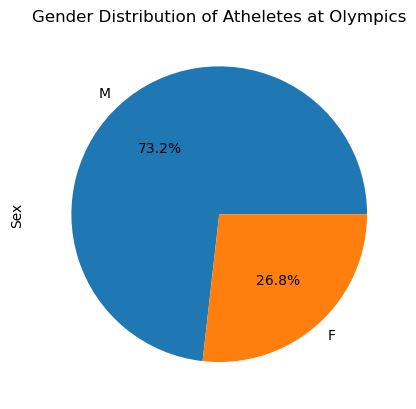

In [44]:
(df_olympics['Sex'].value_counts(normalize= True)  *100).plot(kind = 'pie', autopct = '%.1f%%')
plt.title('Gender Distribution of Atheletes at Olympics')
plt.show()

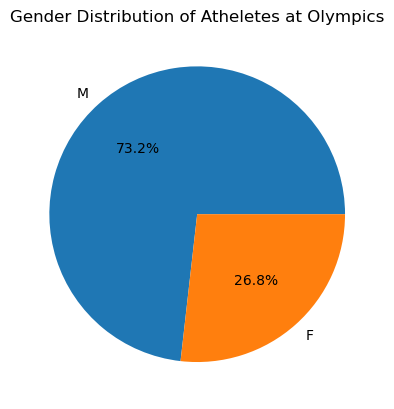

In [45]:
plt.pie(df_olympics['Sex'].value_counts(normalize= True)  *100, labels  = ['M' , 'F'], autopct = '%.1f%%')
plt.title('Gender Distribution of Atheletes at Olympics')
plt.show()

### 3. Top 10 Countries with highest participation rate in Olympics History?

In [35]:
df_olympics['Region'].value_counts().head(10)

USA          14815
Germany      12281
UK           10776
France       10426
Russia        8855
Italy         8170
Australia     7177
Canada        6808
Japan         6316
Hungary       6074
Name: Region, dtype: int64

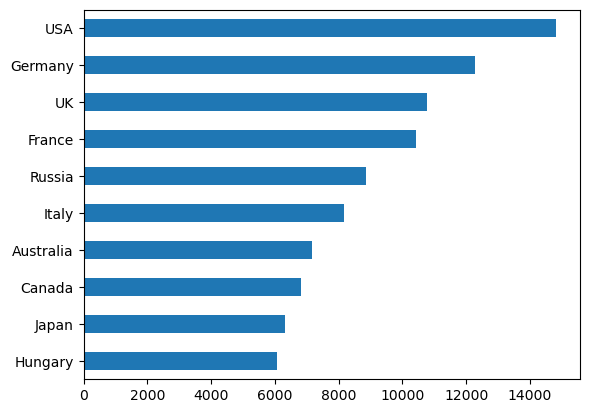

In [46]:
df_olympics['Region'].value_counts().head(10).sort_values().plot(kind = 'barh')
plt.show()

### 4. Average Height and Median Weight for all Atheletes by Gender?

In [48]:
df_olympics.groupby(by = 'Sex').agg({'Height' : 'mean' , 'Weight' : 'median'})


,Height,Weight
Sex,,
F,170.448635,62.000000
M,177.184829,70.697082


### 5. Find out how many Gold medals have India Won so far in Olympics History?

In [49]:
df_olympics.loc[(df_olympics['Region']=='India') & (df_olympics['Medal']=='Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
131299,2699,Shaukat Ali,M,30.0,175.522358,70.697082,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
131301,2703,Syed Mushtaq Ali,M,22.0,165.000000,61.000000,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India
131303,2864,Richard James Allen,M,25.0,172.000000,70.697082,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
131304,2864,Richard James Allen,M,30.0,172.000000,70.697082,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India
131305,2864,Richard James Allen,M,34.0,172.000000,70.697082,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132562,117232,Dung Dung Sylvanus,M,31.0,160.000000,62.000000,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India
132568,118553,Carlyle Carrol Tapsell,M,23.0,182.000000,70.697082,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India
132569,118553,Carlyle Carrol Tapsell,M,27.0,182.000000,70.697082,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India
132618,125560,"Max ""Maxie"" Vaz",M,24.0,175.522358,70.697082,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India


In [50]:
df_olympics.loc[(df_olympics['Region']=='India') & (df_olympics['Medal']=='Gold')][['Year' , 'Event']].drop_duplicates()

,Year,Event
131299,1928,Hockey Men's Hockey
131301,1964,Hockey Men's Hockey
131304,1932,Hockey Men's Hockey
131305,1936,Hockey Men's Hockey
131374,1980,Hockey Men's Hockey
131402,2008,"Shooting Men's Air Rifle, 10 metres"
131483,1948,Hockey Men's Hockey
131484,1952,Hockey Men's Hockey
131485,1956,Hockey Men's Hockey


In [51]:
len(df_olympics.loc[(df_olympics['Region']=='India') & (df_olympics['Medal']=='Gold')][['Year' , 'Event']].drop_duplicates())

9

## Visulaisation and Insight Generation (Advanced):

### 1. How many countries Participated in each Olympics Event:

In [61]:
a  = df_olympics.groupby( 'Year').agg({'Region' : 'nunique'}).reset_index() 
# count of unique values
a

,Year,Region
0,1900,31
1,1904,14
2,1906,20
3,1908,22
4,1912,29
5,1920,29
6,1924,45
7,1928,46
8,1932,47
9,1936,49


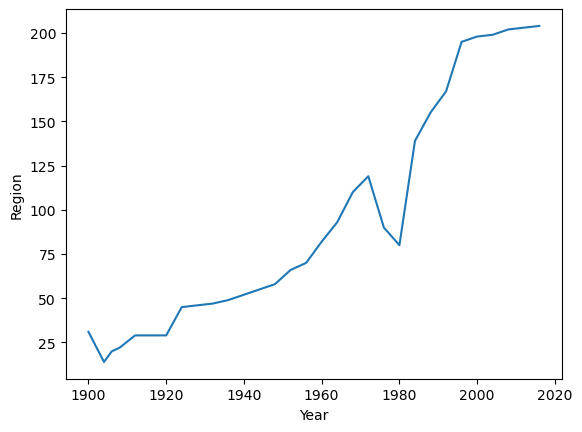

In [62]:
sns.lineplot(x= a['Year'] , y = a['Region'] )
plt.show()

### 2. Perform height vs weight anlysis for all athelete by Gender:

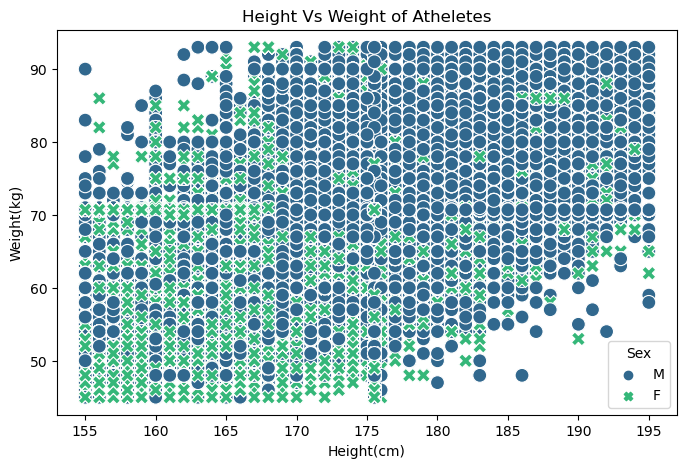

In [64]:
plt.figure(figsize=(8,5))
sns.scatterplot(data = df_olympics, x = 'Height' ,  y = 'Weight' , hue = 'Sex', style='Sex', s = 100, palette='viridis' )
plt.title('Height Vs Weight of Atheletes')
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

### 3. Who won the most number of Medal: Gold, Silver and Bronze respectively in Olympic History?

In [65]:
df_olympics[df_olympics['Medal']== 'Gold']['Name'].value_counts().head()

Michael Fred Phelps, II           23
Raymond Clarence "Ray" Ewry       10
Mark Andrew Spitz                  9
Frederick Carlton "Carl" Lewis     9
Paavo Johannes Nurmi               9
Name: Name, dtype: int64

In [66]:
df_olympics[df_olympics['Medal']== 'Silver']['Name'].value_counts().head()

Shirley Frances Babashoff          6
Aleksandr Nikolayevich Dityatin    6
Mikhail Yakovlevich Voronin        6
Mariya Kindrativna Horokhovska     5
Aleksandr Vladimirovich Popov      5
Name: Name, dtype: int64

In [67]:
df_olympics[df_olympics['Medal']== 'Bronze']['Name'].value_counts().head()

Franziska van Almsick         6
Merlene Joyce Ottey-Page      6
Heikki Ilmari Savolainen      6
Aleksey Yuryevich Nemov       6
Philip Aron "Phil" Edwards    5
Name: Name, dtype: int64

In [68]:
df_olympics[df_olympics['Medal']== 'No Medal']['Name'].value_counts().head()

Joseph "Josy" Stoffel       38
Ioannis Theofilakis         35
Johann "Hans" Sauter        31
Michel Mathiot              31
Heikki Ilmari Savolainen    30
Name: Name, dtype: int64

### 4.Find out the medal distribution for top countries:

In [69]:
subset_df = df_olympics[df_olympics['Medal'] != 'No Medal'][['Region' , 'Year' , 'Event', 'Medal']].drop_duplicates()
subset_df

,Region,Year,Event,Medal
6,China,1996,Softball Women's Softball,Silver
10,China,1984,Basketball Women's Basketball,Bronze
25,China,2008,"Fencing Women's Sabre, Team",Silver
31,China,1996,Gymnastics Women's Uneven Bars,Silver
43,China,1996,Swimming Women's 4 x 100 metres Medley Relay,Bronze
...,...,...,...,...
221922,Vietnam,2008,Weightlifting Men's Bantamweight,Silver
221928,Vietnam,2016,"Shooting Men's Air Pistol, 10 metres",Gold
221929,Vietnam,2016,"Shooting Men's Free Pistol, 50 metres",Silver
222032,Vietnam,2000,Taekwondo Women's Featherweight,Silver


In [70]:
subset_df['Region'].value_counts().head(10)

USA          2538
Russia       1577
Germany      1389
UK            892
France        770
Italy         608
China         545
Australia     518
Sweden        513
Hungary       504
Name: Region, dtype: int64

In [71]:
top_regions = subset_df['Region'].value_counts().head(10).index
print(top_regions)

Index(['USA', 'Russia', 'Germany', 'UK', 'France', 'Italy', 'China',
       'Australia', 'Sweden', 'Hungary'],
      dtype='object')


In [72]:
filtred_df = subset_df[subset_df['Region'].isin(top_regions)]
filtred_df

,Region,Year,Event,Medal
6,China,1996,Softball Women's Softball,Silver
10,China,1984,Basketball Women's Basketball,Bronze
25,China,2008,"Fencing Women's Sabre, Team",Silver
31,China,1996,Gymnastics Women's Uneven Bars,Silver
43,China,1996,Swimming Women's 4 x 100 metres Medley Relay,Bronze
...,...,...,...,...
210715,Australia,1912,"Tennis Men's Singles, Covered Courts",Bronze
210716,Australia,1912,Swimming Women's 100 metres Freestyle,Silver
219099,China,2004,Table Tennis Men's Doubles,Silver
219177,China,1996,Sailing Women's Windsurfer,Gold


In [73]:
medals_data= filtred_df.groupby(by = ['Region' , 'Medal']).size().unstack()
medals_data.sort_values(by = ['Gold' , 'Silver' , 'Bronze'], ascending=False, inplace=True)
medals_data

Medal,Bronze,Gold,Silver
Region,,,
USA,707,1030,801
Russia,487,592,498
Germany,490,442,457
UK,298,278,316
France,282,233,255
China,154,228,163
Italy,198,219,191
Hungary,172,178,154
Sweden,188,150,175


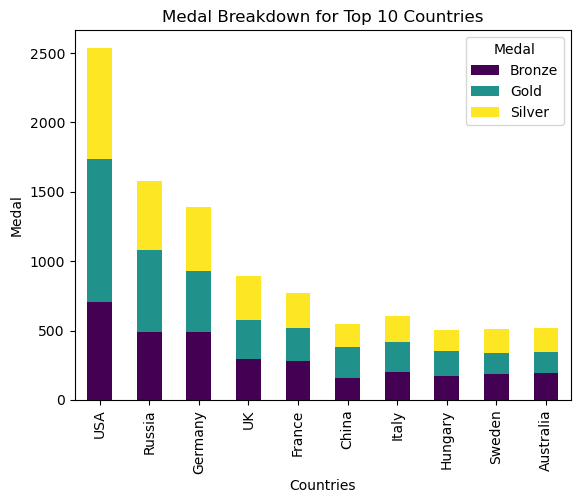

In [79]:
medals_data.plot(kind = 'bar' , stacked = True, colormap='viridis')
plt.title('Medal Breakdown for Top 10 Countries')
plt.xlabel('Countries')
plt.ylabel('Medal')
plt.show()

### 5. Find out in which sport USA has won the most number of Gold:

In [80]:
us_gold = df_olympics[(df_olympics['Region'] == 'USA') & (df_olympics['Medal']=='Gold')]
us_gold

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
12948,150,Margaret Ives Abbott (-Dunne),F,23.0,175.522358,70.697082,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA
12957,351,Julius Shareef Abdur-Rahim,M,23.0,175.522358,70.697082,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,USA
12959,404,"Louis Grenville ""Lou"" Abell",M,15.0,175.522358,70.697082,Vesper Boat Club,USA,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Eights,Gold,USA
12960,404,"Louis Grenville ""Lou"" Abell",M,19.0,175.522358,70.697082,Vesper Boat Club,USA,1904 Summer,1904,Summer,St. Louis,Rowing,Rowing Men's Coxed Eights,Gold,USA
12961,423,Michael Brent Abernathy,M,22.0,182.000000,84.000000,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27909,133237,"Timothy R. ""Tim"" Young",M,26.0,172.000000,77.000000,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold,USA
27934,133685,Mariel Leigh Zagunis,F,19.0,173.000000,72.000000,United States,USA,2004 Summer,2004,Summer,Athina,Fencing,"Fencing Women's Sabre, Individual",Gold,USA
27935,133685,Mariel Leigh Zagunis,F,23.0,173.000000,72.000000,United States,USA,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Women's Sabre, Individual",Gold,USA
27983,135045,Rbert Zimonyi,M,24.0,170.000000,52.000000,United States,USA,1964 Summer,1964,Summer,Tokyo,Rowing,Rowing Men's Coxed Eights,Gold,USA


In [87]:
sport_gold = us_gold.groupby(by = 'Sport').size().sort_values(ascending=False)
sport_gold.head()

Sport
Swimming      649
Athletics     542
Basketball    281
Rowing        186
Shooting      117
dtype: int64